Зачет 4.1
 Исследовательский анализ данных
1. Для каждой страны найдите среднюю цену вина. Для каждой страны найдите максимальную цену вина.Для каждой страны найдите минимальную цену вина. Для каждой страны найдите количество записей.
2. Определить, какие вины лидируют по рейтингам. Выберите несколько вин с наилучшим рейтингом.
3. Построить график «ящик с усами» по рейтингам в разбивке по странам, по сортам вина. Опишите результат.
4. Определить, как влияют отзывы внутри одной страны на цены.
5. Построить диаграмму рассеяния и посчитайте корреляцию между рейтингами и ценами. Сформулировать выводы.
6. Посмотреть на общее распределение вин по странам. Что можно сказать о самых распрастраненных сортах вина?
7. Вина какой области (province) получают наилучший рейтинг?Более дорогие вина оцениваются выше?
8. В какой части мира производят вина с более высоким рейтингом?
9. Какое описание вин более высоко оценено?
10. Какой сорт вина более высоко оценен?
11. Сколько денег стоит получить вино с высоким рейтингом в стране?
12. Какие винодельни производят самые дорогие/высоко оцененные вина?
13. Какие винодельни/регионы/страны производят вина с самым низким рейтингом?
14. Провести анализ сорта вина (например, белого вина Шардоне) и проанализировал стоимость и качество в основных регионах-производителях в мире.

In [279]:
# import
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib as mpl
df = pd.read_csv('G:/study/documents_study/materials/wine_1.csv')
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"With a delicate, silky mouthfeel and bright ac...",NaN,86,23.0,California,Central Coast,Central Coast,Pinot Noir,MacMurray Ranch
1,Italy,D'Alceo is a drop dead gorgeous wine that ooze...,D'Alceo,96,275.0,Tuscany,Toscana,NaN,Red Blend,Castello dei Rampolla


1. Для каждой страны найдите среднюю цену вина.Для каждой страны найдите максимальную цену вина.Для каждой страны найдите минимальную цену вина. Для каждой страны найдите количество записей.


In [6]:
print(df.isnull().sum())

country            0
description        0
designation     6001
points             0
price           1802
province           0
region_1        3457
region_2       11942
variety            0
winery             0
dtype: int64


In [36]:
#1.1 Для каждой страны найдите среднюю цену вина
mean_price = (df
              .groupby('country')
              .mean('price')
              .head(5)
              )
print(mean_price)

                           points      price
country                                     
Argentina               86.215259  22.502747
Australia               87.977492  30.607780
Austria                 89.095465  31.691395
Bosnia and Herzegovina  88.000000  12.000000
Brazil                  83.666667  24.666667


In [35]:
#1.2 Для каждой страны найдите максимальную цену вина
max_price = (df
              .groupby('country')
              .max('price')
              .head(5)
              )
print(max_price)

                        points   price
country                               
Argentina                   97   215.0
Australia                   98   550.0
Austria                     96  1100.0
Bosnia and Herzegovina      88    12.0
Brazil                      85    35.0


In [34]:
#1.3 Для каждой страны найдите минимальную цену вина
min_price = (df
              .groupby('country')
              .min('price')
              .head(5)
              )
print(min_price)

                        points  price
country                              
Argentina                   80    6.0
Australia                   80    5.0
Austria                     82    8.0
Bosnia and Herzegovina      88   12.0
Brazil                      82   13.0


In [42]:
#1.4 Для каждой страны найдите кол-во записей
count = (df
            .value_counts('country')
            .head(10)
            )
print(count)



country
US             8247
Italy          3092
France         2751
Spain          1090
Chile           780
Portugal        751
Argentina       734
Australia       622
New Zealand     446
Austria         419
dtype: int64


2. Определить, какие вины лидируют по рейтингам. Выберите несколько вин с наилучшим рейтингом.

In [43]:
top_wines = df[df['points'] == 100]
province = top_wines.pivot_table(df, 
                          index='province')
print(province)

            points   price
province                  
California     100   245.0
Champagne      100  1400.0
Tuscany        100   460.0


3. Построить график «ящик с усами» по рейтингам в разбивке по странам, по сортам вина. Опишите результат.


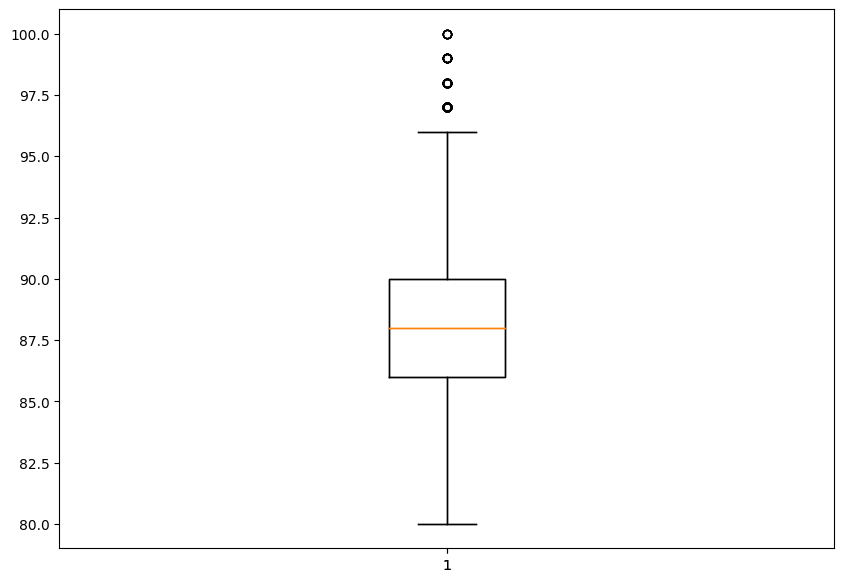

In [109]:
# Creating dataset
fig = plt.figure(figsize =(10, 7)) 
 
# Creating axes instance
#ax = fig.add_axes(df
#                  ['country'])

# Creating plot
#bp = ax.boxplot(df
#            ['points'])

# Creating plot
plt.boxplot(df
            ['points'])
# show plot
plt.show()




4. Определить, как влияют отзывы внутри одной страны на цены.

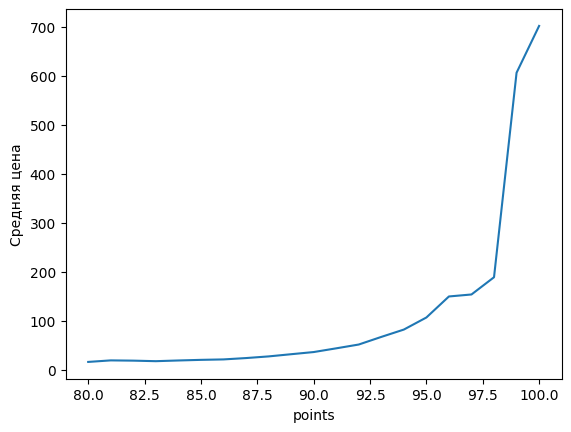

In [28]:
d = df.groupby('points').mean()
plt.xlabel('points')
plt.ylabel('Средняя цена')
plt.plot(d.index, d.values)

5. Построить диаграмму рассеяния и посчитайте корреляцию между рейтингами и ценами. Сформулировать выводы.


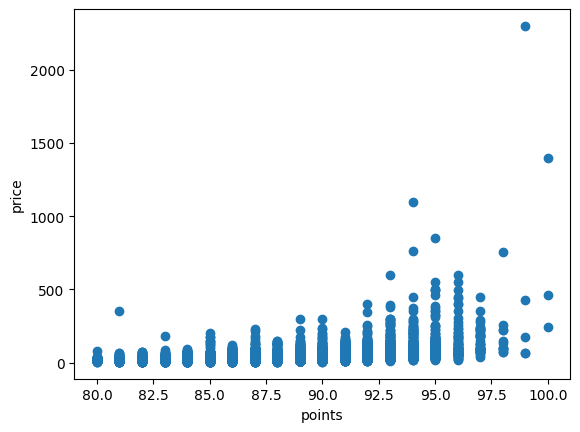

In [29]:
plt.xlabel('points')
plt.ylabel('price')
plt.scatter(x=df['points'], y=df['price'])

6. Посмотреть на общее распределение вин по странам. Что можно сказать о самых распрастраненных сортах вина?


<BarContainer object of 7 artists>

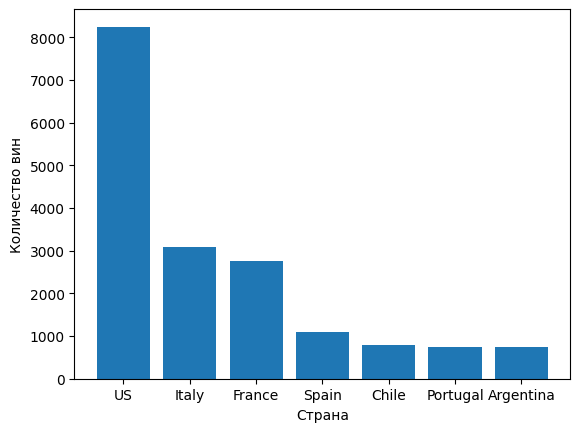

In [46]:
countries = df['country'].value_counts().head(7)
plt.xlabel('Cтрана')
plt.ylabel('Количество вин')
plt.bar(x=countries.index, height=countries.values)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Pinot Noir'),
  Text(1, 0, 'Chardonnay'),
  Text(2, 0, 'Cabernet Sauvignon'),
  Text(3, 0, 'Red Blend'),
  Text(4, 0, 'Bordeaux-style Red Blend'),
  Text(5, 0, 'Sauvignon Blanc'),
  Text(6, 0, 'Syrah'),
  Text(7, 0, 'Riesling'),
  Text(8, 0, 'Merlot'),
  Text(9, 0, 'Zinfandel')])

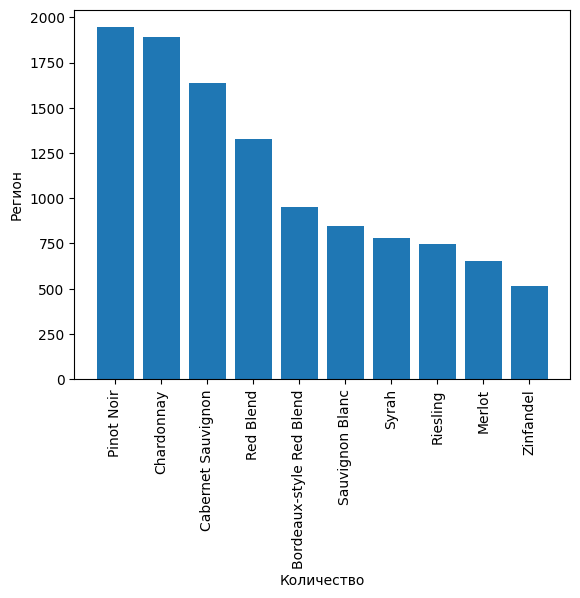

In [53]:
variety = df['variety'].value_counts().head(10)
plt.xlabel('Количество')
plt.ylabel('Регион')
plt.bar(x=variety.index, height=variety.values)
plt.xticks(rotation=90)

7. Вина какой области (province) получают наилучший рейтинг?Более дорогие вина оцениваются выше?


In [343]:
dfp = df.copy()
dfp.drop(['description','designation','region_1','region_2','winery'], axis=1, inplace=True)
dfp = dfp. dropna()
dfp.isnull().sum()
dfp.head(3)




pd.pivot_table(dfp,
                    index=["province"],
                    values=["points"],
                    ).sort_values(by=['points'],ascending=False).head(5)




,points
province,
Madeira,93.0
Martinborough Terrace,93.0
Eisenberg,92.0
Minho,92.0
Tokaji,91.6


8. В какой части мира производят вина с более высоким рейтингом?


In [394]:
region = {
'Italy':'Europe',
'Portugal':'Europe',
'US':'North America',
'Spain':'Europe',
'France':'Europe',
'Germany':'Europe',
'Argentina':'Latin America',
'Chile':'Latin America',
'Australia': 'Oceania',
'Austria': 'Europe',
'South Africa': 'Africa',
'New Zealand': 'Oceania',
'Israel': 'Asia',
'Hungary':'Europe',
'Greece':'Europe',
'Romania':'Europe',
'Mexico':'Latin America',
'Canada':'North America',
'Turkey': 'Asia',
'Czech Republic': 'Europe',
'Slovenia': 'Europe',
'Luxembourg': 'Europe',
'Croatia': 'Europe',
'Georgia':'Europe',
'Uruguay': 'Latin America',
'England': 'Europe',
'Lebanon': 'Asia',
'Serbia': 'Europe',
'Brazil': 'Latin America',
'Moldova': 'Europe',
'Morocco':'Africa',
'Peru':'Latin America',
'India':'Asia',
'Bulgaria':'Europe',
'Cyprus': 'Europe',
'Armenia':'Asia',
'Switzerland':'Europe',
'Bosnia and Herzegovina':'Europe',
'Ukraine':'Europe',
'Slovakia':'Europe',
'Macedonia':'Europe',
'China':'Asia',
'Egypt':'Africa'
}
dfp['region'] = dfp['country'].map(region)
dfp.head(10)

pd.pivot_table(dfp,
                    index=["region"],
                    values=["points"],
                    ).sort_values(by=['points'],ascending=False).head(5)

,points
region,
Europe,88.123732
Oceania,87.824952
North America,87.823108
Asia,87.223301
Africa,87.059801


9. Какое описание вин более высоко оценено?


10. Какой сорт вина более высоко оценен?


In [347]:
pd.pivot_table(dfp,
                    index=["variety"],
                    values=["points"],
                    ).sort_values(by=['points'],ascending=False).head(5)

,points
variety,
Tokay,96.0
Syrah-Viognier,94.0
Sauvignon Gris,94.0
Muskat Ottonel,94.0
Roussanne-Viognier,93.0


11. Сколько денег стоит получить вино с высоким рейтингом в стране?


In [352]:
pd.pivot_table(dfp,
                    index=["country"],
                    values=["price","points"],
                    ).sort_values(by=['points'],ascending=False).head(5)

,points,price
country,,
Austria,89.008902,31.691395
Germany,88.898017,35.609065
France,88.640228,46.297564
Italy,88.384304,37.177184
Slovenia,88.166667,24.416667


12. Какие винодельни производят самые дорогие/высоко оцененные вина?


In [363]:
pd.pivot_table(dfp,
                    index=["variety"],
                    values=["price","points"],
                    ).sort_values(by=['points','price'],ascending=False).head(5)

,points,price
variety,,
Tokay,96.0,160.666667
Syrah-Viognier,94.0,75.000000
Muskat Ottonel,94.0,48.000000
Sauvignon Gris,94.0,40.000000
Madeira Blend,93.0,40.000000


13. Какие винодельни/регионы/страны производят вина с самым низким рейтингом?


In [362]:
pd.pivot_table(dfp,
                    index=["variety","country","province"],
                    values=["points"],
                    ).sort_values(by=['points'],ascending=True).head(5)

,,,points
variety,country,province,
Parraleta,Spain,Northern Spain,80.0
Tempranillo-Merlot,Spain,Northern Spain,80.0
Red Blend,Chile,Casablanca Valley,80.0
White Blend,Chile,Casablanca Valley,80.0
Pinot Grigio,Argentina,Mendoza Province,80.0


14. Провести анализ сорта вина (например, белого вина Шардоне) и проанализировал стоимость и качество в основных регионах-производителях в мире.


In [364]:
color = {"Chardonnay": "white",
"Pinot Noir": 'red',
"Cabernet Sauvignon": "red",
"Red Blend": "red",
"Bordeaux-style Red Blend": "red",
"Sauvignon Blanc": "white",
"Syrah": "red",
"Riesling": "white",
"Merlot": "red",
"Zinfandel": "red",
"Sangiovese": "red",
"Malbec": "red",
"White Blend": "white",
"Rosé": "other",
"Tempranillo": "red",
"Nebbiolo": "red",
"Portuguese Red": "red",
"Sparkling Blend": "other",
"Shiraz": "red",
"Corvina, Rondinella, Molinara": "red",
"Rhône-style Red Blend": "red",
"Barbera": "red",
"Pinot Gris": "white",
"Viognier": "white",
"Bordeaux-style White Blend": "white",
"Champagne Blend": "other",
"Port": "red",
"Grüner Veltliner": "white",
"Gewürztraminer": "white",
"Portuguese White": "white",
"Petite Sirah": "red",
"Carmenère": "red"}

#dfcolor = pd.DataFrame(color,index=['color']).T
dfp['color'] = dfp['variety'].map(color)
dfp.head(10)

,country,points,price,province,variety,color
0,US,86,23.0,California,Pinot Noir,red
1,Italy,96,275.0,Tuscany,Red Blend,red
2,France,91,40.0,Bordeaux,Bordeaux-style Red Blend,red
3,Italy,81,15.0,Tuscany,Sangiovese,red
4,US,83,25.0,Oregon,Pinot Noir,red
5,Austria,96,89.0,Wachau,Riesling,white
6,US,84,40.0,California,Bordeaux-style Red Blend,red
7,US,93,40.0,California,Syrah,red
8,US,93,44.0,California,Pinot Noir,red
9,US,85,35.0,California,Merlot,red


In [393]:
#"Chardonnay": "white"
#price 
#points
#province

dfp[dfp.variety == 'Chardonnay'].pivot_table(index='province', values=['points','price'],
                                 aggfunc={'points': 'count', 'price': np.mean}).sort_values(by=['points'],ascending=False).head(5)



,points,price
province,,
California,853,28.201641
Burgundy,233,64.454936
Washington,94,22.106383
New York,68,16.220588
Mendoza Province,45,12.755556
